In [9]:
#项目8-项目实施代码
import pandas as pd
#读取数据
dataset=pd.read_csv('item8-ss-data-y.csv')
print('“泰坦尼克号”乘客信息数据集')
print(dataset)
#显示数据集信息
dataset.info()

“泰坦尼克号”乘客信息数据集
    pclass                                             name     sex      age  \
0      1st                     Allen, Miss Elisabeth Walton  female  29.0000   
1      1st                      Allison, Miss Helen Loraine  female   2.0000   
2      1st              Allison, Mr Hudson Joshua Creighton    male  30.0000   
3      1st  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  female  25.0000   
4      1st                    Allison, Master Hudson Trevor    male   0.9167   
..     ...                                              ...     ...      ...   
834    3rd                                 Guest, Mr Robert    male      NaN   
835    3rd                     Gustafsson, Mr Alfred Ossian    male  20.0000   
836    3rd                    Gustafsson, Mr Anders Vilhelm    male  37.0000   
837    3rd                      Gustafsson, Mr Johan Birger    male  28.0000   
838    3rd                       Gustafsson, Mr Karl Gideon    male  19.0000   

        embarked      ti

In [10]:
#数据预处理
#删除name列、ticket列和room列
dataset.drop(['name','ticket','room'],inplace=True,axis=1)
#补充age列的缺失值（用平均值进行补充）
dataset['age']=dataset['age'].fillna(dataset['age'].mean()) 
#删除有缺失值的所有行
dataset=dataset.dropna()  

#将pclass列转换为数值型数据，分别用0、1和2代替（三分类）
labels=dataset['pclass'].unique().tolist()
dataset['pclass']=dataset['pclass'].apply(lambda x:labels.index(x)) 

#将sex列转换为数值型数据，分别用0和1代替(二分类)
dataset['sex']=(dataset['sex']=='male').astype(int)

#将embarked列转换为数值型数据，分别用0、1和2代替（三分类）
labels=dataset['embarked'].unique().tolist()
dataset['embarked']=dataset['embarked'].apply(lambda x:labels.index(x))

print(dataset)
dataset.info()#显示数据集信息

     pclass  sex        age  embarked  survived
0         0    0  29.000000         0         1
1         0    0   2.000000         0         0
2         0    1  30.000000         0         0
3         0    0  25.000000         0         0
4         0    1   0.916700         0         1
..      ...  ...        ...       ...       ...
834       2    1  31.194181         0         0
835       2    1  20.000000         0         0
836       2    1  37.000000         0         0
837       2    1  28.000000         0         0
838       2    1  19.000000         0         0

[821 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 838
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    821 non-null    int64  
 1   sex       821 non-null    int32  
 2   age       821 non-null    float64
 3   embarked  821 non-null    int64  
 4   survived  821 non-null    int64  
dtypes: float64(1), int

最大预测准确率为：0.824242
预测准确率最大的模型对应的参数值为：41


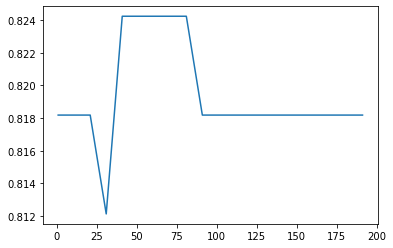

In [11]:
#调节随机森林算法的n_estimators参数，并画出对应的学习曲线
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#提取特征变量与标签
x=dataset.iloc[range(0,821),range(0,4)].values
y=dataset.iloc[range(0,821),range(4,5)].values.reshape(1,821)[0]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
score=[]
for i in range(0,200,10):
    model=RandomForestClassifier(random_state=0,n_estimators=i+1)
    model= model.fit(x_train,y_train)
    pred=model.predict(x_test)
    ac=accuracy_score(y_test,pred)
    score.append(ac)
print('最大预测准确率为：%f'%max(score))
n=score.index(max(score))*10+1
print('预测准确率最大的模型对应的参数值为：%.0f'%n)
plt.plot(range(1,201,10),score)
plt.show()

In [12]:
#训练与评估模型
from sklearn.metrics import classification_report

model=RandomForestClassifier(random_state=0,n_estimators=41)
model.fit(x_train,y_train)
pred=model.predict(x_test)
re=classification_report(y_test,pred)
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        93
           1       0.79      0.82      0.80        72

    accuracy                           0.82       165
   macro avg       0.82      0.82      0.82       165
weighted avg       0.83      0.82      0.82       165



In [13]:
#使用模型预测新数据
test=pd.read_csv('item8-ss-test-y.csv')
print('需预测数据')
print(test)

需预测数据
   pclass     sex  age     embarked            name  ticket   room
0     1st    male   39    Cherbourg           Blank     NaN   A-31
1     1st  female   30  Southampton   Miss Caroline     NaN    C-7
2     1st  female   58  Southampton  Miss Elizabeth     NaN  C-103
3     1st  female   45    Cherbourg           Bowen     NaN    NaN
4     1st  female   22  Southampton        Bowerman     NaN    NaN
5     2nd    male   34  Southampton      Mr William     NaN    NaN
6     2nd  female   32  Southampton     Mrs William     NaN    NaN
7     2nd    male   57  Southampton           Ashby     NaN    NaN
8     2nd    male   18  Southampton          Bailey     NaN    NaN
9     2nd    male   23  Southampton      Baimbrigge     NaN    NaN
10    3rd    male   42  Southampton      Mr Anthony     NaN    NaN
11    3rd    male   13  Southampton   Master Eugene     NaN    NaN
12    3rd    male   16  Southampton    Mr Rossmore      NaN    NaN
13    3rd  female   35  Southampton     Mrs Stanton     

In [14]:
#处理数据
#将pclass列转换为数值型数据，分别用0、1和2代替（三分类）
labels=test['pclass'].unique().tolist()
test['pclass']=test['pclass'].apply(lambda x:labels.index(x)) 
#将sex列转换为数值型数据，分别用0和1代替(二分类)
test['sex']=(test['sex']=='male').astype(int)
#将embarked列转换为数值型数据，分别用0、1和2代替（三分类）
labels=test['embarked'].unique().tolist()
test['embarked']=test['embarked'].apply(lambda x:labels.index(x)) 
print(test)

    pclass  sex  age  embarked            name  ticket   room
0        0    1   39         0           Blank     NaN   A-31
1        0    0   30         1   Miss Caroline     NaN    C-7
2        0    0   58         1  Miss Elizabeth     NaN  C-103
3        0    0   45         0           Bowen     NaN    NaN
4        0    0   22         1        Bowerman     NaN    NaN
5        1    1   34         1      Mr William     NaN    NaN
6        1    0   32         1     Mrs William     NaN    NaN
7        1    1   57         1           Ashby     NaN    NaN
8        1    1   18         1          Bailey     NaN    NaN
9        1    1   23         1      Baimbrigge     NaN    NaN
10       2    1   42         1      Mr Anthony     NaN    NaN
11       2    1   13         1   Master Eugene     NaN    NaN
12       2    1   16         1    Mr Rossmore      NaN    NaN
13       2    0   35         1     Mrs Stanton     NaN    NaN
14       2    0   16         1      Miss Anna      NaN    NaN


In [15]:
#使用模型进行预测
x_new=test.iloc[range(0,14),range(0,4)].values  
names=test.iloc[range(0,14),range(4,5)].values  
pred=model.predict(x_new)
for result,name in zip(pred,names):
    if result==1:
        print(name+"能够获救")
    else:
         print(name+"不能获救")


['Blank不能获救']
['Miss Caroline能够获救']
['Miss Elizabeth能够获救']
['Bowen能够获救']
['Bowerman能够获救']
['Mr William不能获救']
['Mrs William能够获救']
['Ashby不能获救']
['Bailey不能获救']
['Baimbrigge不能获救']
['Mr Anthony不能获救']
['Master Eugene不能获救']
['Mr Rossmore 不能获救']
['Mrs Stanton能够获救']
